In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Identify the TEXT COLUMN**

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Creating a TEXT column from numeric features**

In [6]:
df['transaction_text'] = (
    "transaction with amount " + df['Amount'].round(2).astype(str) +
    " at time " + df['Time'].astype(str)
)
df[['transaction_text']].head()


,transaction_text
0,transaction with amount 149.62 at time 0.0
1,transaction with amount 2.69 at time 0.0
2,transaction with amount 378.66 at time 1.0
3,transaction with amount 123.5 at time 1.0
4,transaction with amount 69.99 at time 2.0


**Using this column for NLP**

In [7]:
text_column = 'transaction_text'


**TEXT CLEANING (NLP PREPROCESSING)**

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['transaction_text'].apply(clean_text)
df[['clean_text']].head()

,clean_text
0,transaction with amount at time
1,transaction with amount at time
2,transaction with amount at time
3,transaction with amount at time
4,transaction with amount at time


**TOKENIZATION (WORDS)**

In [11]:
df['tokens'] = df['clean_text'].apply(lambda x: x.split())
df[['tokens']].head()


,tokens
0,"[transaction, with, amount, at, time]"
1,"[transaction, with, amount, at, time]"
2,"[transaction, with, amount, at, time]"
3,"[transaction, with, amount, at, time]"
4,"[transaction, with, amount, at, time]"


*Due to environment limitations, tokenization was performed using Python’s native string splitting instead of external NLP tokenizers.*

**BUILD VOCABULARY**

In [12]:
all_tokens = [word for row in df['tokens'] for word in row]
vocab = set(all_tokens)

len(vocab)

5

**1) AUTOCOMPLETE IMPLEMENTATION**

Build word pairs (bigrams)


In [14]:
from nltk.util import ngrams

bigrams = list(ngrams(all_tokens, 2))
bigram_freq = Counter(bigrams)

**Autocomplete function**

In [16]:
def autocomplete(word, top_n=5):
    suggestions = {
        pair[1]: freq
        for pair, freq in bigram_freq.items()
        if pair[0] == word
    }
    return sorted(suggestions, key=suggestions.get, reverse=True)[:top_n]


**Testing it**

In [18]:
autocomplete("transaction")
autocomplete("with")


['amount']

**2) AUTOCORRECT IMPLEMENTATION**

In [20]:
from difflib import get_close_matches

def autocorrect(word):
    return get_close_matches(word, vocab, n=3, cutoff=0.6)


**Testing it**

In [21]:
autocorrect("transacton")
autocorrect("amunt")


['amount']

**ANALYTICS METRICS**

In [23]:
Counter(all_tokens)

Counter({'transaction': 284807,
         'with': 284807,
         'amount': 284807,
         'at': 284807,
         'time': 284807})

**VISUALIZATION**

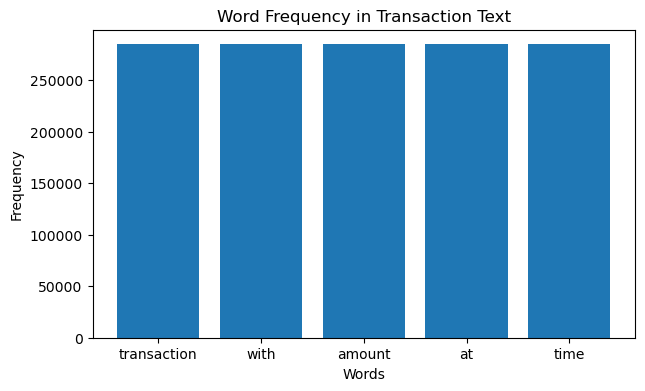

In [25]:
word_freq = Counter(all_tokens)
words, counts = zip(*word_freq.items())

plt.figure(figsize=(7,4))
plt.bar(words, counts)
plt.title("Word Frequency in Transaction Text")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()